In [24]:
from google.colab import drive
drive.mount('/content/drive')

import os
path = "/content/drive/My Drive/os-project/dataset/"
os.chdir(path)

import pandas as pd
files = os.listdir()

files

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['sqli-extended.csv',
 'clean_sql_dataset.csv',
 'sqliv2.csv',
 'SQLiV3.csv',
 'sqli.csv',
 'sql_injection_dataset.csv',
 'Modified_SQL_Dataset.csv',
 'SQL_Dataset.csv']

In [27]:
dataframes = []

for f in files:
  print(f, type(f))
  if (f in ['sqliv2.csv', 'sqli.csv']):
    df = pd.read_csv(f, encoding='utf-16')
  else:
    df = pd.read_csv(f)


  # Update Columns Name to Query and Label
  print("column names before:")
  for column_name in df.columns:
      print(column_name)

  index_0 = 0
  column_name_0 = 'Query'
  index_1 = 1
  column_name_1 = 'Label'

  df.columns.values[index_0] = column_name_0
  df.columns.values[index_1] = column_name_1

  print("column names after:")
  for column_name in df.columns:
    print(column_name)

  dataframes.append(df)

sqli-extended.csv <class 'str'>
column names before:
Sentence
Label
column names after:
Query
Label
clean_sql_dataset.csv <class 'str'>
column names before:
Query
Label
column names after:
Query
Label
sqliv2.csv <class 'str'>
column names before:
Sentence
Label
column names after:
Query
Label
SQLiV3.csv <class 'str'>
column names before:
Sentence
Label
Unnamed: 2
Unnamed: 3
column names after:
Query
Label
Unnamed: 2
Unnamed: 3
sqli.csv <class 'str'>
column names before:
Sentence
Label
column names after:
Query
Label
sql_injection_dataset.csv <class 'str'>
column names before:
Query
Label
column names after:
Query
Label
Modified_SQL_Dataset.csv <class 'str'>
column names before:
Query
Label
column names after:
Query
Label
SQL_Dataset.csv <class 'str'>
column names before:
Query
Label
column names after:
Query
Label


In [30]:
# concatenate all datasets in one DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)

combined_df

,Query,Label,Unnamed: 2,Unnamed: 3
0,""" or pg_sleep ( __TIME__ ) --",1,NaN,NaN
1,create user name identified by pass123 tempora...,1,NaN,NaN
2,%29,1,NaN,NaN
3,' AND 1 = utl_inaddr.get_host_address ( ( S...,1,NaN,NaN
4,select * from users where id = '1' or @ @1 = ...,1,NaN,NaN
...,...,...,...,...
419476,DELETE FROM door WHERE grow = 'small',0,NaN,NaN
419477,DELETE FROM tomorrow,0,NaN,NaN
419478,SELECT wide ( s ) FROM west,0,NaN,NaN
419479,SELECT * FROM ( SELECT slide FROM breath ),0,NaN,NaN


In [5]:
import pandas as pd

def clean_data(df):
  df = df.loc[:, ~df.columns.str.startswith('Unnamed')]
  df = df.dropna()

  df = df[df['Label'].astype(str).str.isdigit()]
  df['Label'] = df['Label'].astype(int)

  df.reset_index(drop=True, inplace=True)

  df = df.drop_duplicates()
  df = df.reset_index(drop=True)
  return df

In [6]:
cleaned_data = clean_data(combined_df)
cleaned_data

,Query,Label
0,""" or pg_sleep ( __TIME__ ) --",1
1,create user name identified by pass123 tempora...,1
2,%29,1
3,' AND 1 = utl_inaddr.get_host_address ( ( S...,1
4,select * from users where id = '1' or @ @1 = ...,1
...,...,...
163432,No law sacred nature,0
163433,"There mortifying experience particular, fail ...",0
163434,"Scipio, Milton called height Rome; history re...",0
163435,"For instance, English question sentences, end...",0


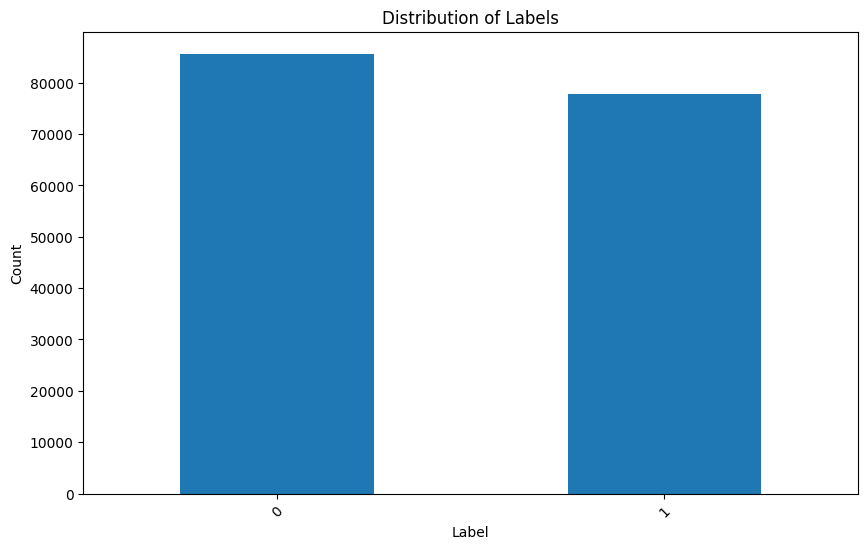

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

label_counts = cleaned_data['Label'].value_counts()

plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar')
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [10]:


# Specify the path to save the new CSV file in Google Drive
output_file_path = '/content/drive/My Drive/os-project/output_dataset/cleaned-output-dataset.csv'

# Save the DataFrame to a new CSV file
cleaned_data.to_csv(output_file_path, index=False)

print("DataFrame saved to", output_file_path)


DataFrame saved to /content/drive/My Drive/os-project/dataset/cleaned-output-dataset.csv
